<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1101_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
repo='https://raw.githubusercontent.com/pcsilcan/dm/master/20202/data/'
irisfile='iris.csv'
url='%s%s'%(repo, irisfile)

In [14]:
df = pd.read_csv(url).sample(frac=1)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
13,4.3,3.0,1.1,0.1,Setosa
122,7.7,2.8,6.7,2.0,Virginica
94,5.6,2.7,4.2,1.3,Versicolor
28,5.2,3.4,1.4,0.2,Setosa
149,5.9,3.0,5.1,1.8,Virginica


In [15]:
df = df.replace("Setosa", 0)
df = df.replace("Versicolor", 1)
df = df.replace("Virginica", 2)

X = df.iloc[:, :-1].to_numpy()
y = pd.get_dummies(df.iloc[:, -1]).to_numpy()

In [21]:
print(X.shape, y.shape)

(150, 4) (150, 3)


In [16]:
pca = PCA(n_components = 2)
x2D = pca.fit_transform(X)

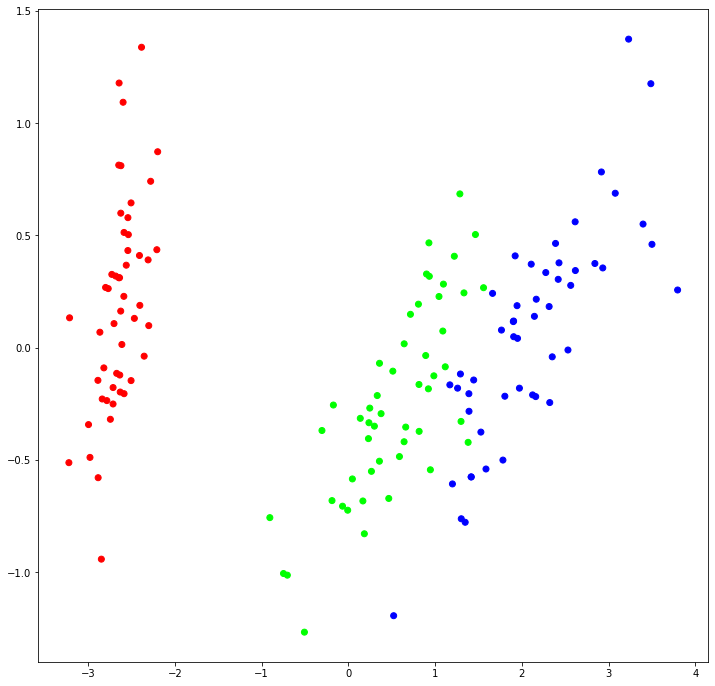

In [17]:
plt.subplots(figsize=(12, 12))
plt.scatter(x2D[:, 0], x2D[:, 1], c=y)

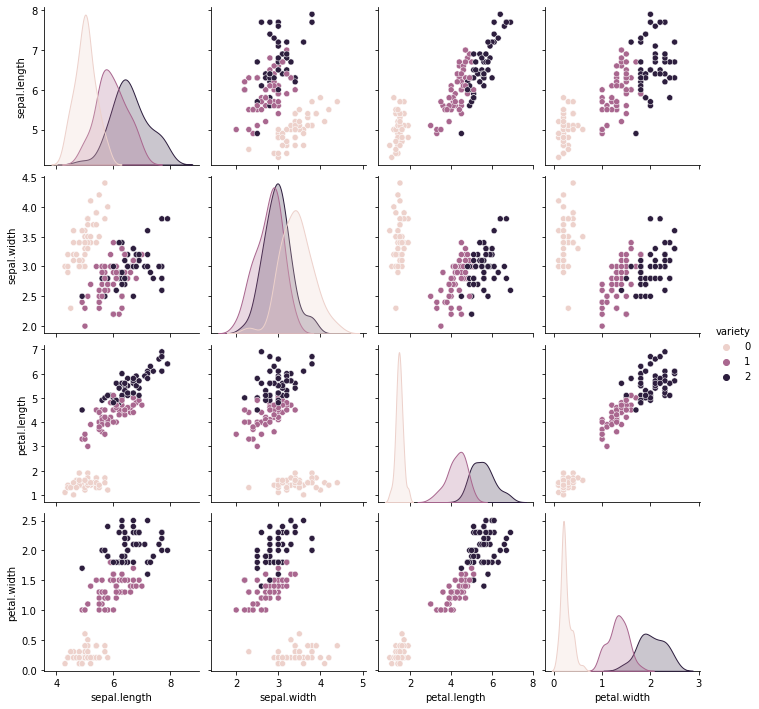

In [18]:
sns.pairplot(df, hue="variety")

## from PCA

In [29]:
import random

In [43]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
model2 = Sequential([Dense(8, input_dim=4, activation='relu'),
                     Dense(25, activation='relu'),
                     Dense(3, activation='softmax')])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X, y, epochs=50, batch_size=16, verbose=0)
model2.evaluate(X, y)

5/5 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9733


[0.15463897585868835, 0.9733333587646484]

In [42]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
model1 = Sequential([Dense(8, input_dim=2, activation='relu'),
                     Dense(25, activation='relu'),
                     Dense(3, activation='softmax')])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(x2D, y, epochs=50, batch_size=16, verbose=0)
model1.evaluate(x2D, y)

5/5 [==============================] - 0s 3ms/step - loss: 0.1419 - accuracy: 0.9467


[0.14192603528499603, 0.9466666579246521]

In [47]:
for i in range(4):
    for j in range(4):
        if i == j: continue
        random.seed(0)
        np.random.seed(0)
        tf.random.set_seed(0)
        model3 = Sequential([Dense(8, input_dim=2, activation='relu'),
                            Dense(25, activation='relu'),
                            Dense(3, activation='softmax')])
        model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model3.fit(X[:, [i, j]], y, epochs=50, batch_size=16, verbose=0)
        model3.evaluate(X[:, [i, j]], y)

5/5 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.8867
